In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
import seaborn as sb
import numpy as np
from plotter import *
import pandas as pd
import glob
import os
from pygenesys.utils.growth_model import *

In [8]:
files = glob.glob('data/objective_value_*.csv')
files.sort()
files

['data/objective_value_LC.csv',
 'data/objective_value_XN.csv',
 'data/objective_value_ZAN.csv',
 'data/objective_value_ZN.csv']

In [9]:
obj_dict = {}
for fname in files:
    scenario = fname.strip('.csv').split('_')[-1]
    obj_df = pd.read_csv(fname)
    data = np.array(obj_df['Objective_Value'])
    obj_dict[scenario] = data
df = pd.DataFrame(obj_dict)
df

,LC,XN,ZAN,ZN
0,132315.601802,151025.624131,151025.624133,175088.403022
1,132232.727857,144134.489927,144134.489927,165874.167996
2,132830.508005,147751.603162,147751.603159,170334.328278
3,132235.847781,145313.159879,145313.159880,167081.216337
4,132980.314790,150157.669495,150157.669494,172996.306221
...,...,...,...,...
96,131928.261316,149243.663438,149243.663441,172316.508795
97,131393.141364,146973.573350,146973.573350,169247.949009
98,131585.051766,142721.440408,142721.440408,164002.454648
99,131579.249009,144603.366788,144603.366789,166338.214748


In [10]:
# get the total demand
annual_demand = linear_growth(1.87e5, 2025, 2050, 6, 0.01) # GWh
tot_gwh = annual_demand.sum()

In [19]:
annual_demand

array([187000., 196350., 205700., 215050., 224400., 233750.])

Text(0.5, 1.0, 'Variability of Electricity Cost')

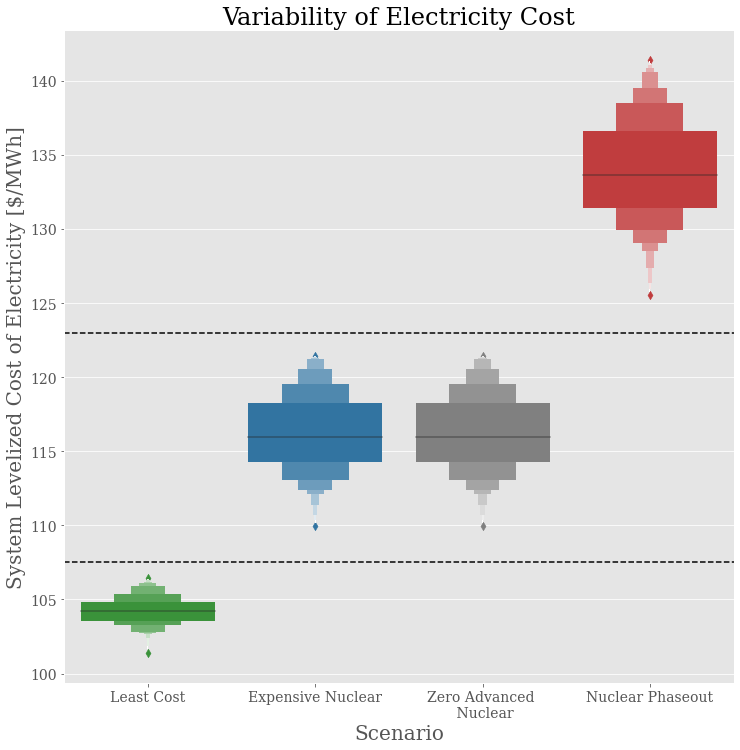

In [18]:
ax = sb.boxenplot(data = df/tot_gwh*1000, palette={'LC':'tab:green',
                                                   'XN':'tab:blue',
                                                   'ZAN':'gray',
                                                   'ZN':'tab:red'})
ax.set_xlabel('Scenario', fontsize=20)
labels = {0:'Least Cost', 1:'Expensive Nuclear', 2:'Zero Advanced \n Nuclear', 3:'Nuclear Phaseout'}
plt.xticks(list(labels.keys()), list(labels.values()), fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel('System Levelized Cost of Electricity [$/MWh]', fontsize=20)
ax.axhline(y=((125+121)/2), color='k', linestyle='--')
ax.axhline(y=((109+106)/2), color='k', linestyle='--')
ax.set_title('Variability of Electricity Cost', fontsize=24)

In [6]:
(df/tot_gwh*1000).describe()

,LC,XN,ZAN,ZN
count,101.000000,101.000000,101.000000,101.000000
mean,104.252805,116.255901,116.255901,134.017663
std,0.942351,2.651169,2.651169,3.500519
min,101.387491,109.937536,109.937536,125.516362
25%,103.532436,114.278504,114.278504,131.422404
50%,104.241829,115.948745,115.948745,133.671898
75%,104.823954,118.264291,118.264291,136.649721
max,106.427746,121.448294,121.448294,141.415300
